# House Pricing Machine Learning Model
This notebook will walkthrough the steps to build a model to predict house sale prices. Several model types will be used and they accuracy will be compared.

Data for this project comes from [https://www.kaggle.com/datasets/harlfoxem/housesalesprediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

---

<a id='outline'></a>
## Project Outline

1. [Importing Packages](#section1)
2. [Import Data and Explatory Data Analysis](#section2)
3. [Data Visualization](#section3)
4. [Preprocessing for Model](#section4)
5. [Model 1 - Linear Regression](#section5)
6. [Model 2 - Deep Neural Network](#section6)
7. [Evaluation](#section7)


<a id='section1'></a>
### 1. Importing Packages

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import ensemble
from sklearn.metrics import r2_score

[top](#outline)

<a id='section2'></a>
### 2. Import Data and Exploratory Data Analysis

In [14]:
df = pd.read_csv(
    'kc_house_data.csv',
    parse_dates=['date'],
    index_col=['id']
    )

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


35 bedrooms is probably an outlier:

In [41]:
df[df['bedrooms']>20]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Since there is only one of these, we'll drop it to get better correlation between bedrooms and price in our model later:

In [42]:
df.drop(df[df['bedrooms']>20].index, inplace=True)

[top](#outline)

<a id='section3'></a>
### 3. Data Visualization

In [17]:
# Plot style and size
sns.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (20, 10)

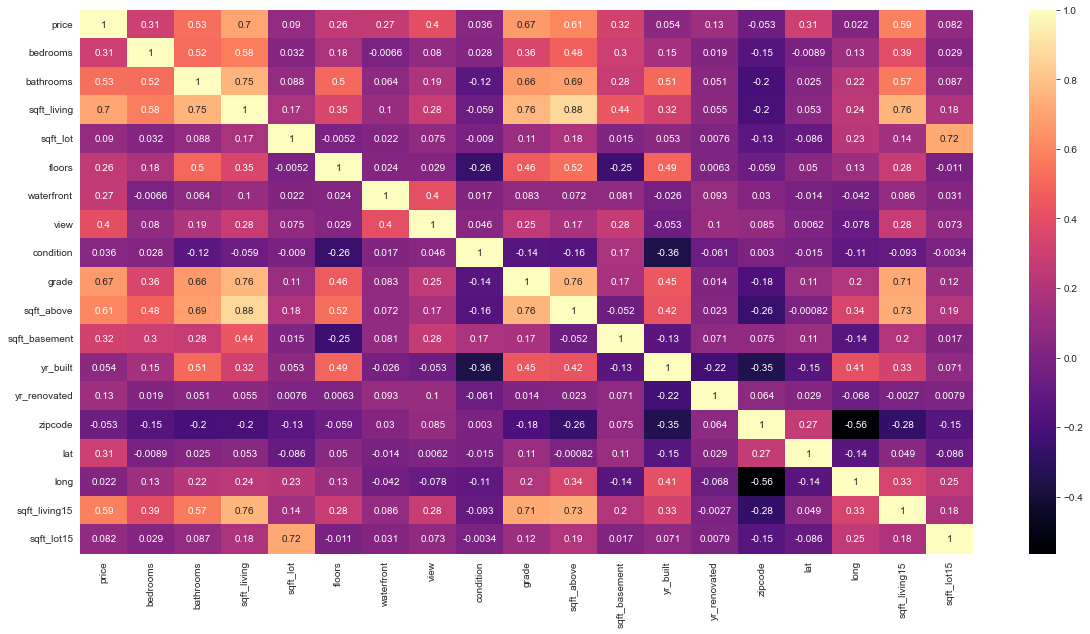

In [18]:
# 1. Heatmap

sns.heatmap(df.corr(), annot= True, cmap='magma')
plt.show()

In [35]:
# 2. Scatter plot

def scatter_df(y_var, columns):
    colors = iter(['orange','yellow','aquamarine','deepskyblue',
                   'crimson','darkviolet','khaki','gold','r','deeppink'])
    for i in columns:      
        try:
            plot = sns.scatterplot(
                x=i, y=y_var, data = df, 
                color=next(colors), edgecolor = 'b', s = 150)
            plt.title(f'{i} / Sale Price', fontsize = 16)
            plt.xlabel(f'{i}', fontsize = 14)
            plt.ylabel('Sale Price', fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
        except StopIteration:
            colors = iter(['orange','yellow','aquamarine','deepskyblue',
                   'crimson','darkviolet','khaki','gold','r','deeppink'])
            plot = sns.scatterplot(
                x=i, y=y_var, data = df, 
                color=next(colors), edgecolor = 'b', s = 150)
            plt.title(f'{i} / Sale Price', fontsize = 16)
            plt.xlabel(f'{i}', fontsize = 14)
            plt.ylabel('Sale Price', fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()   


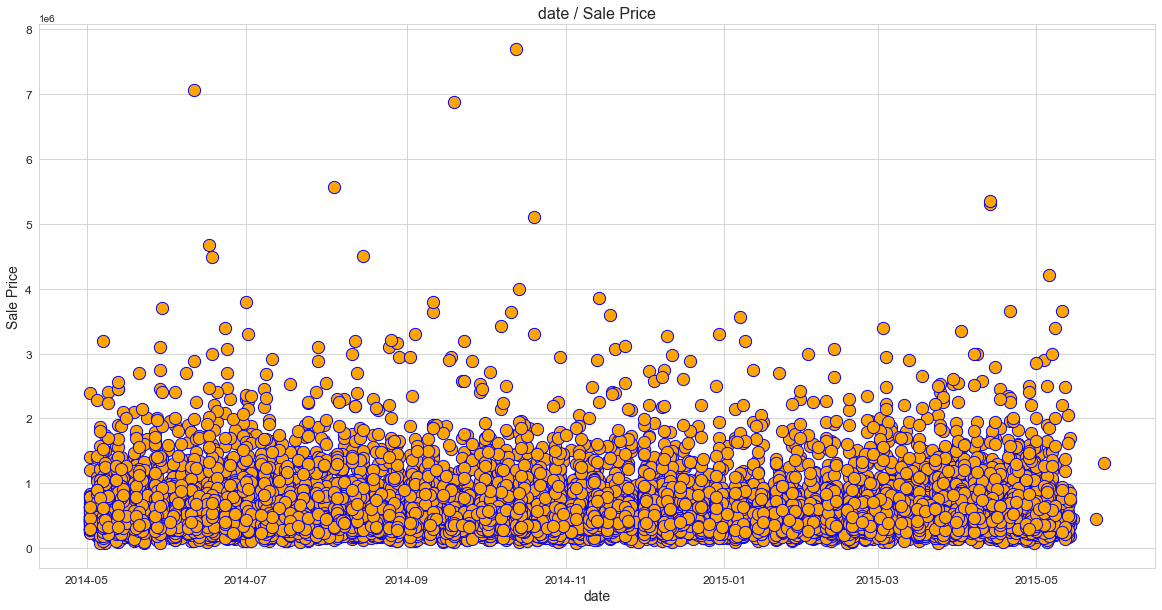

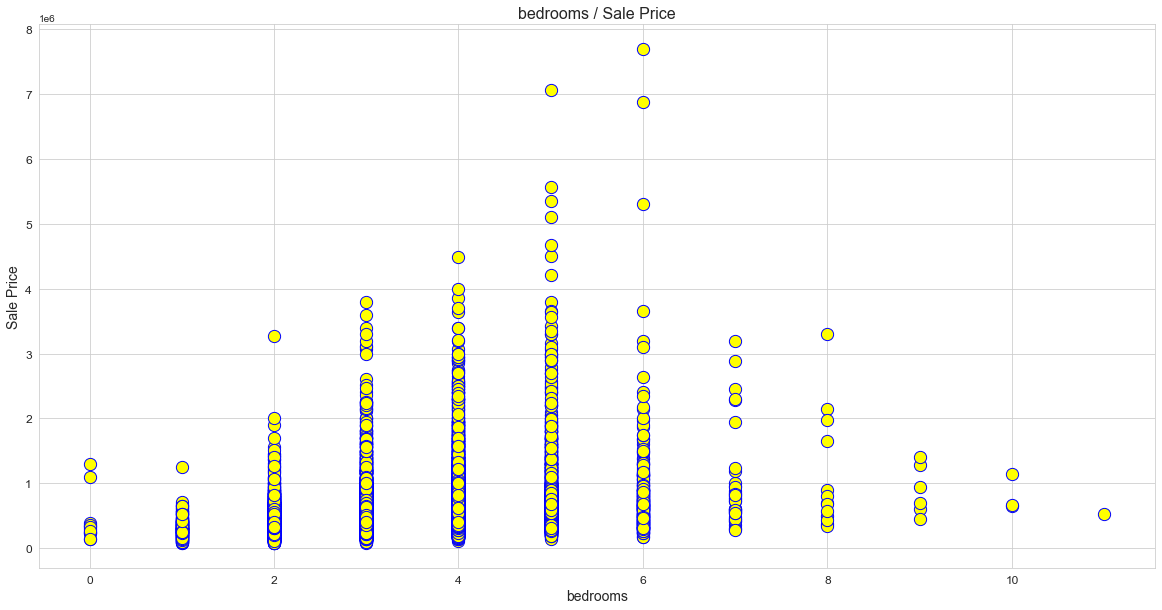

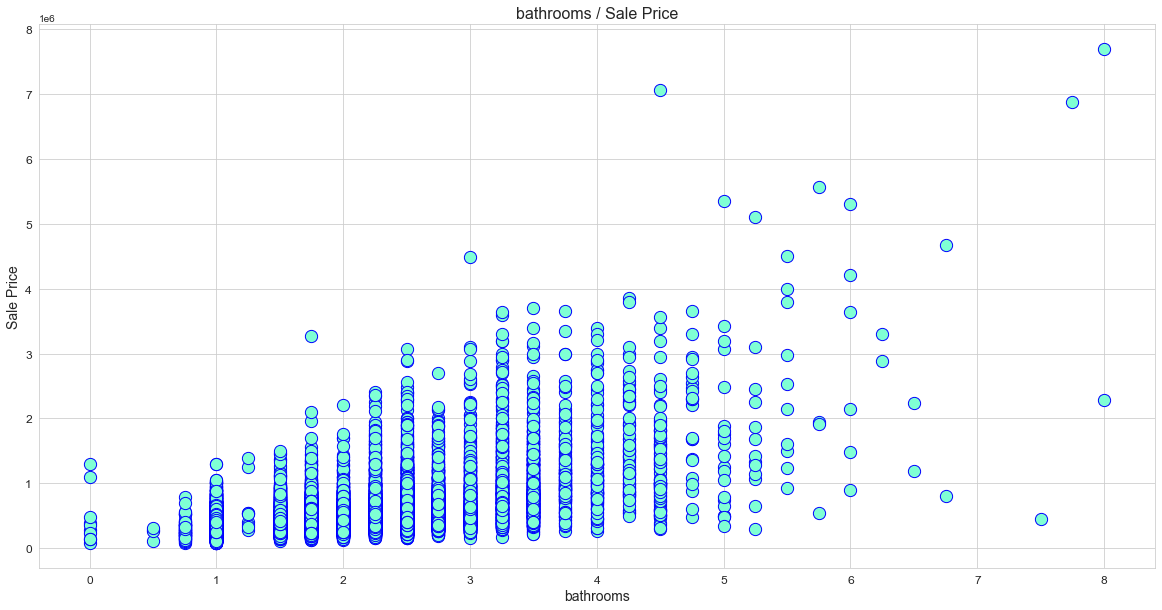

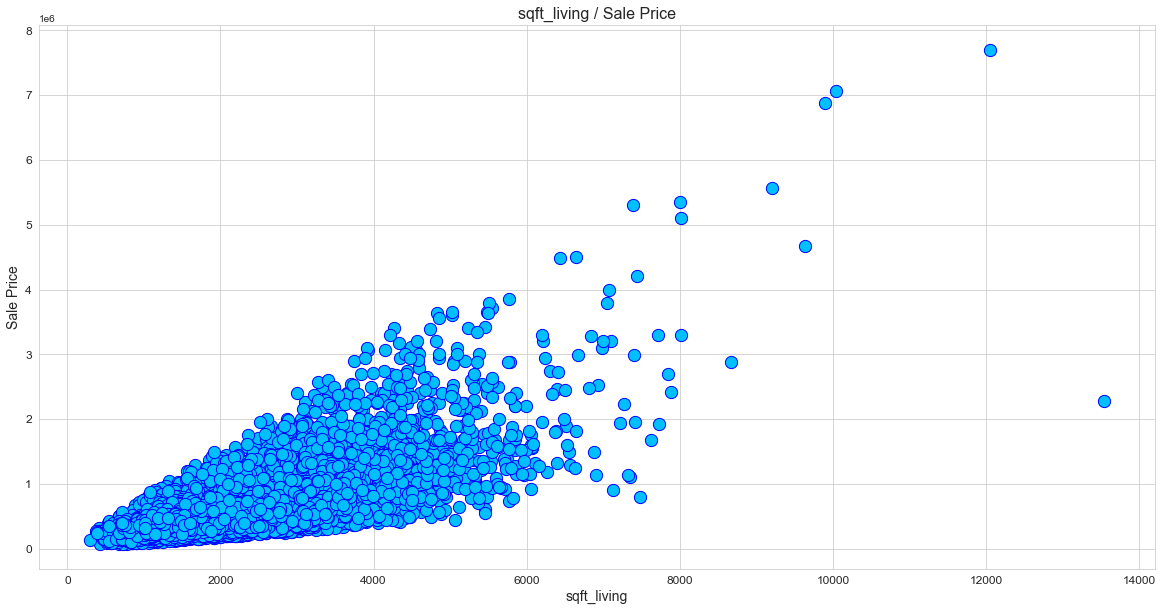

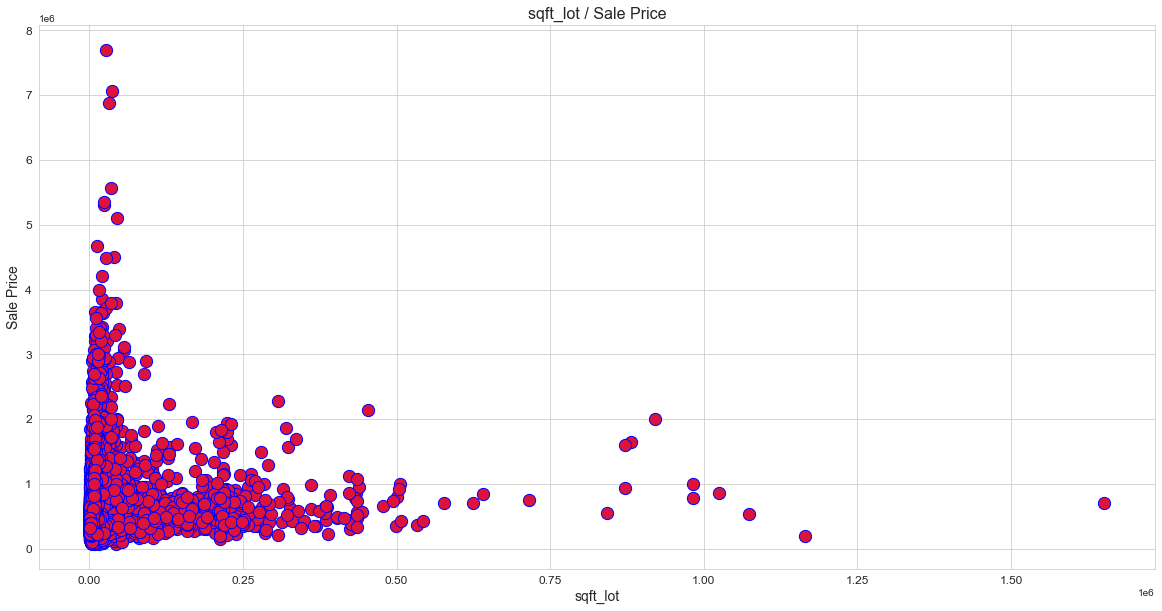

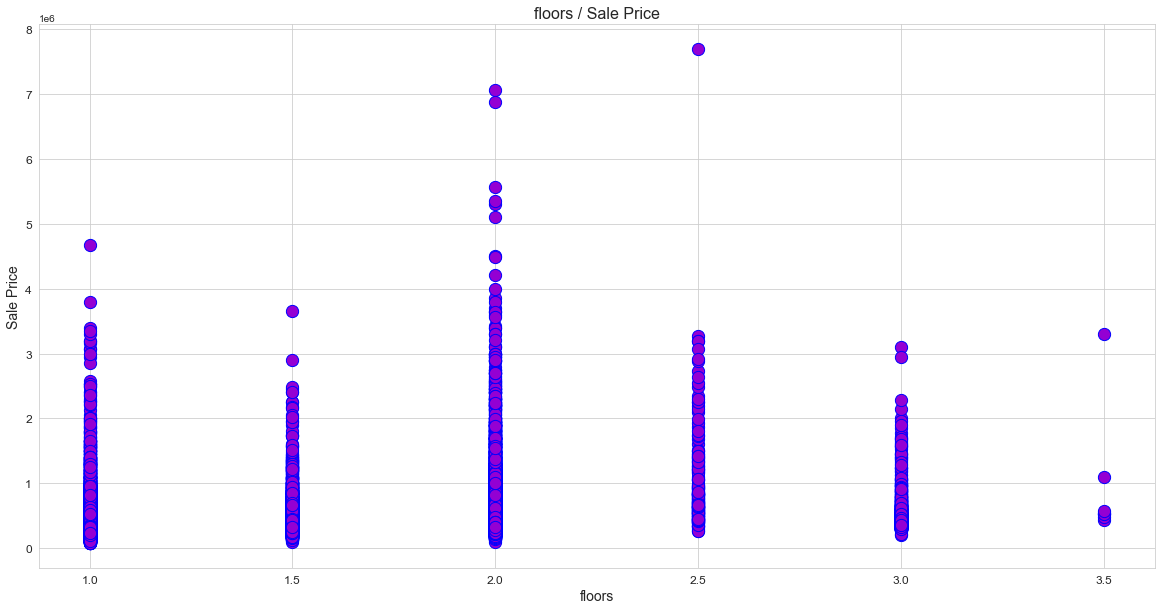

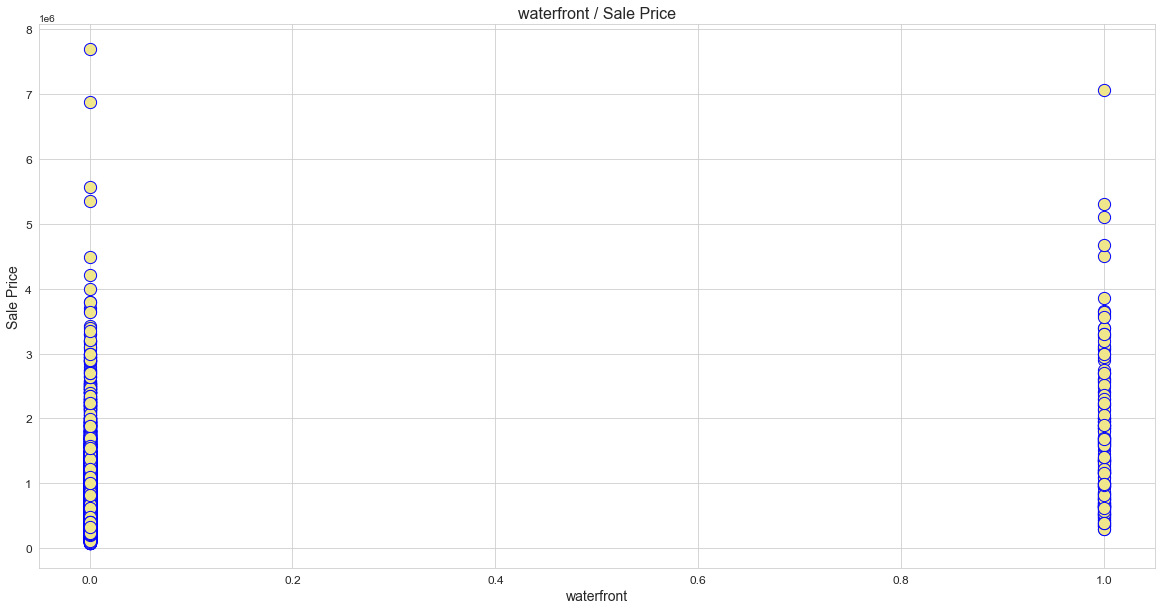

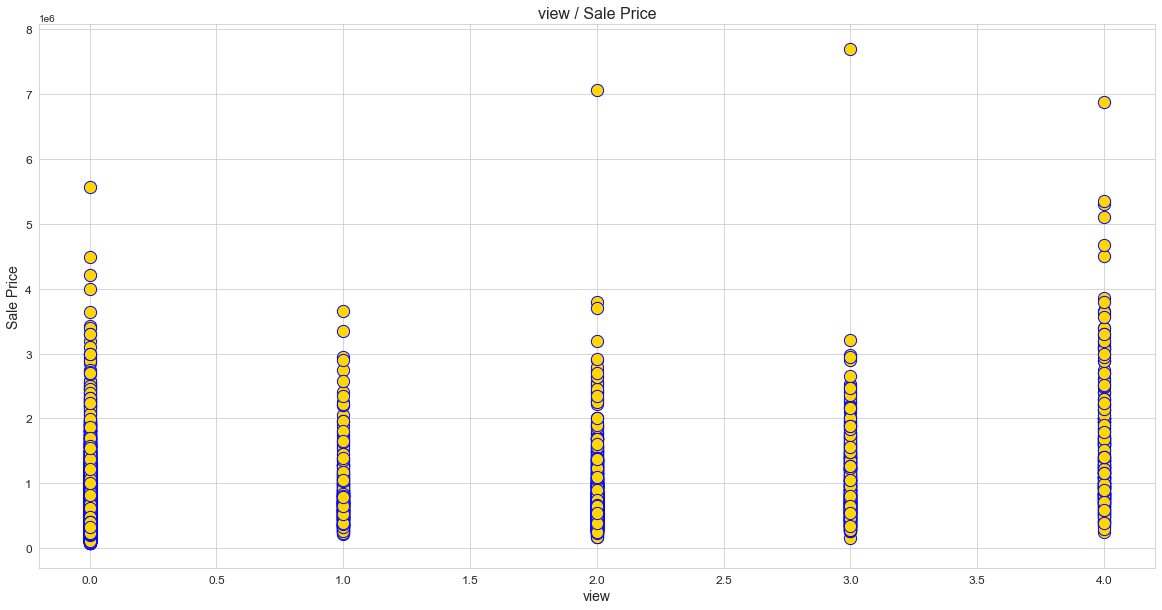

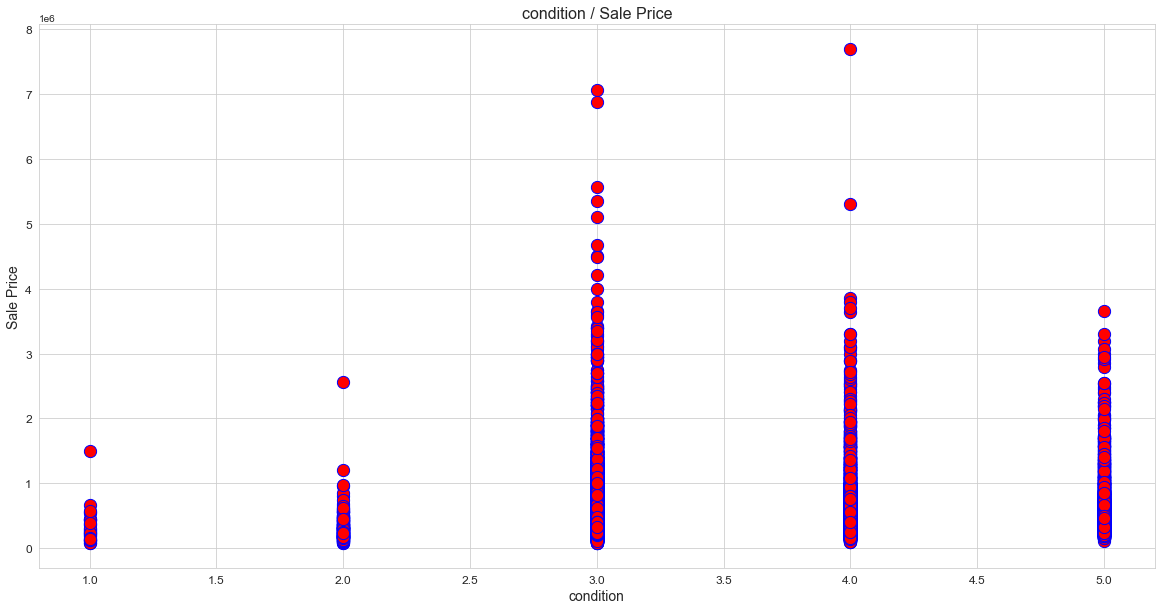

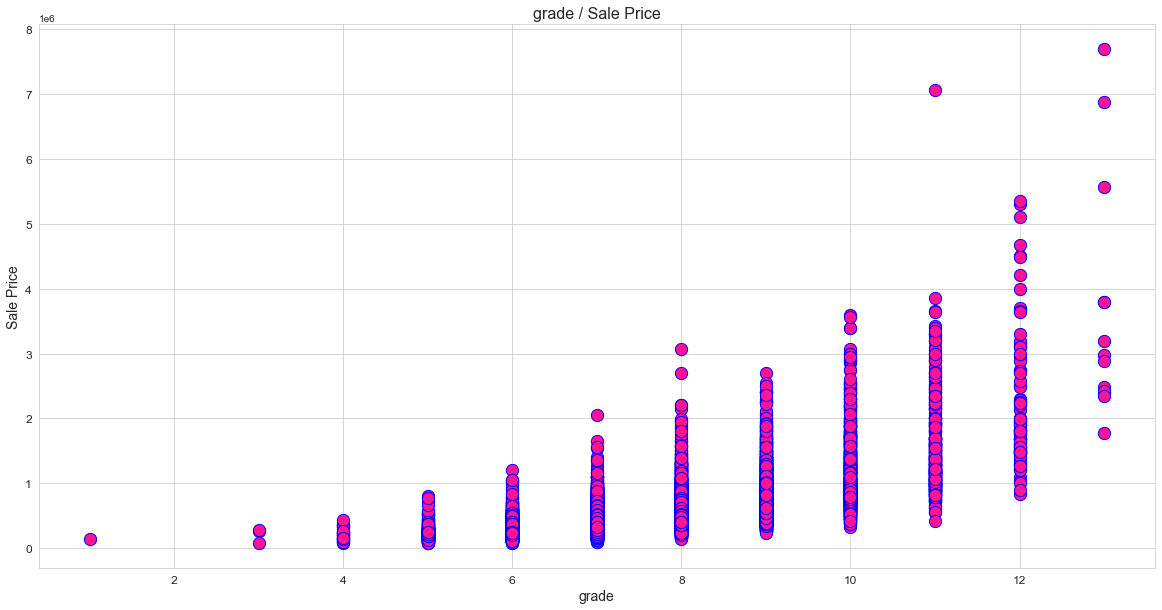

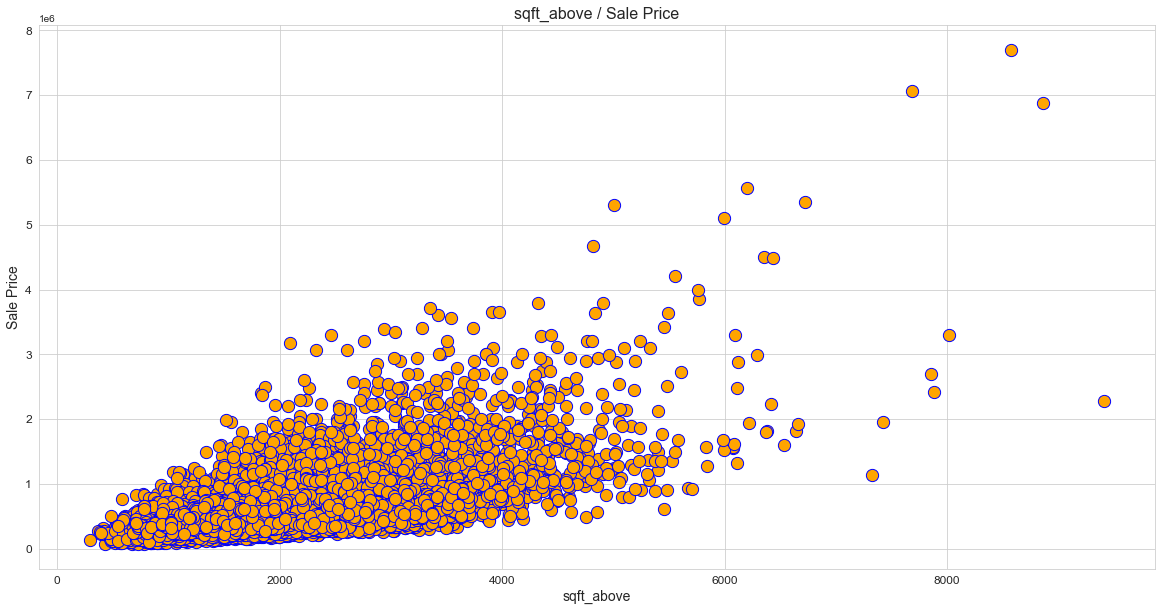

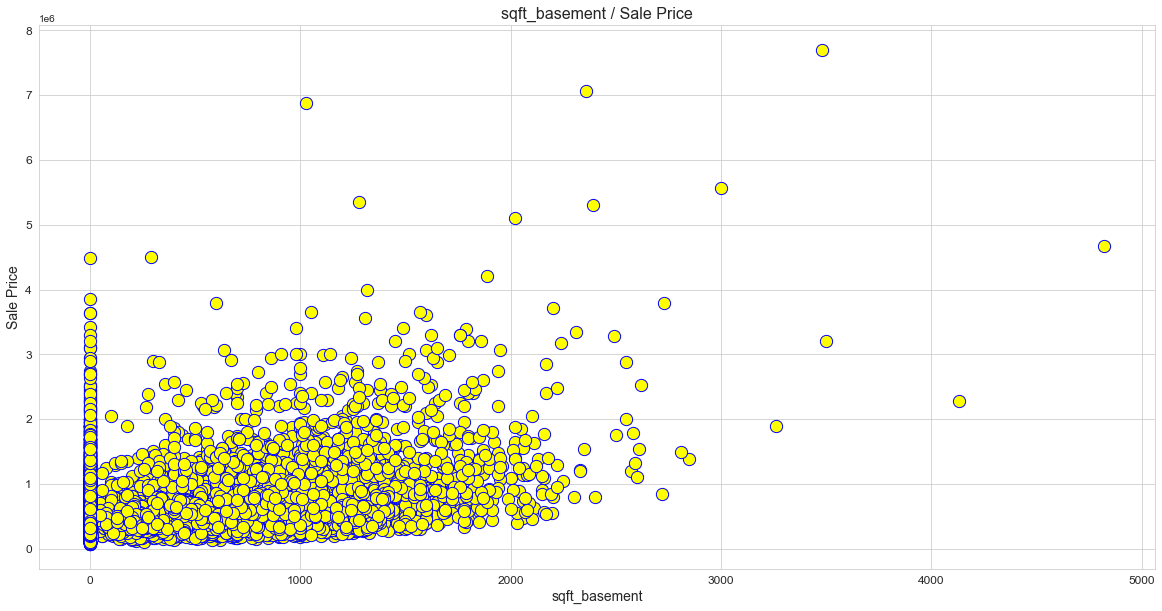

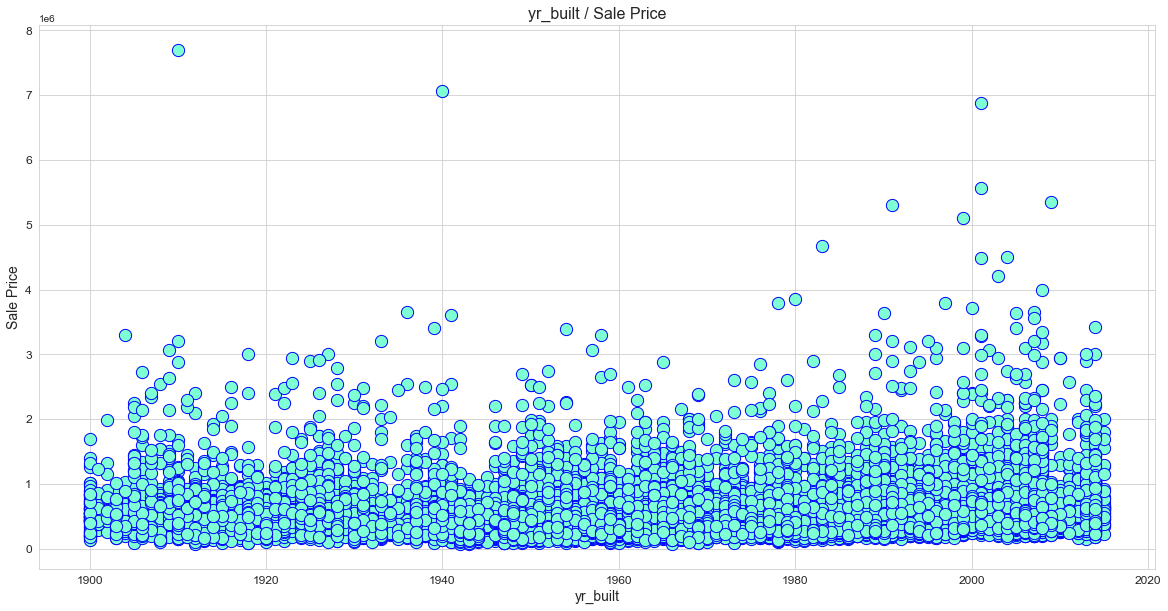

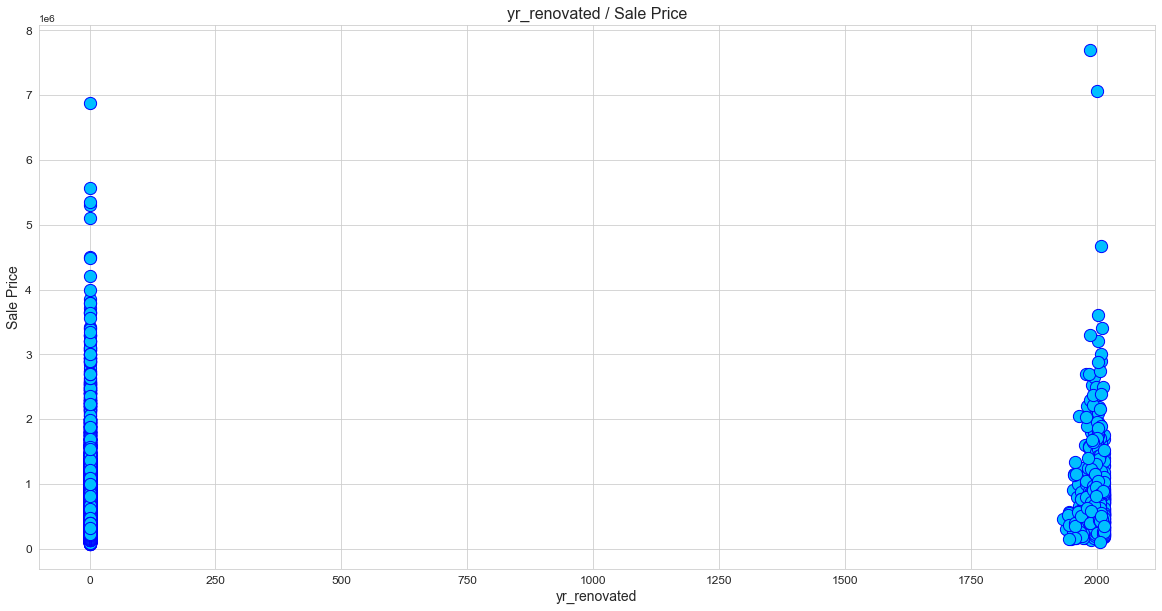

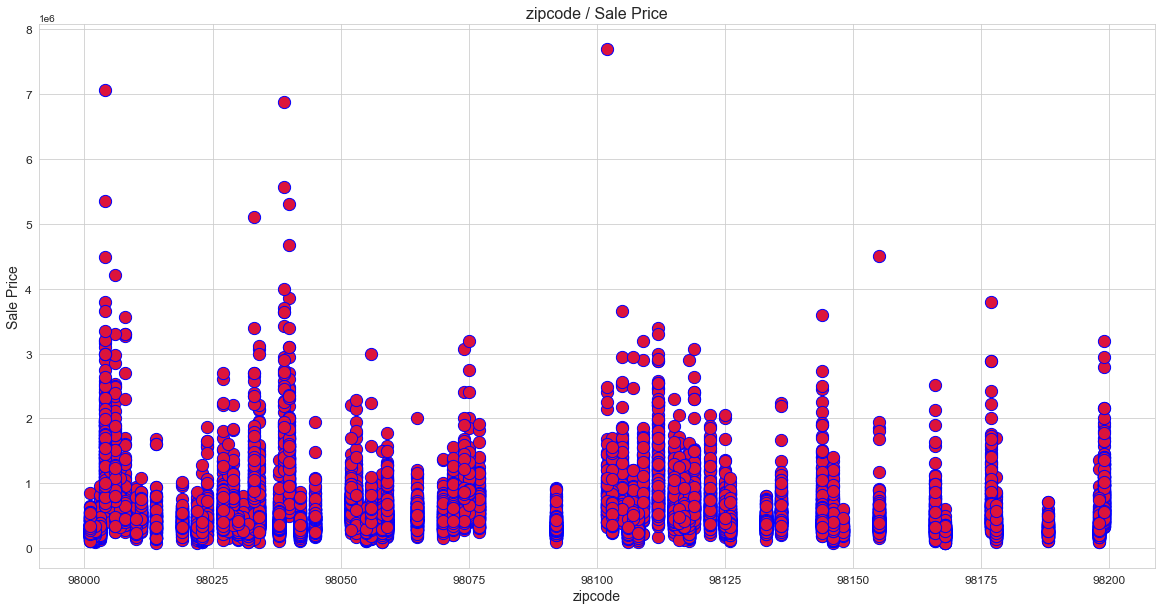

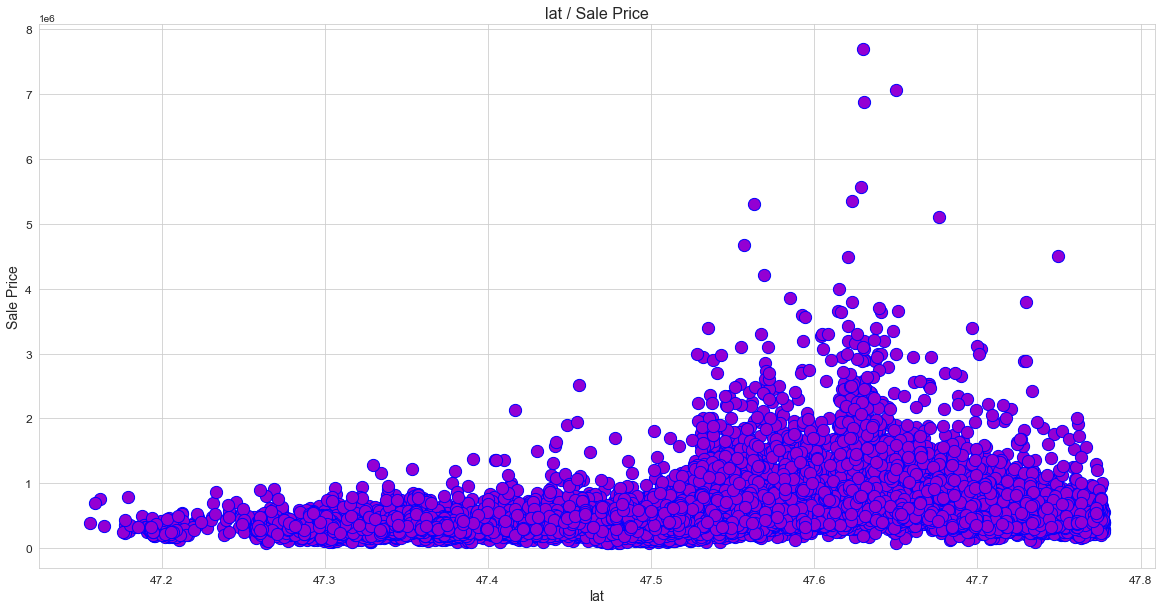

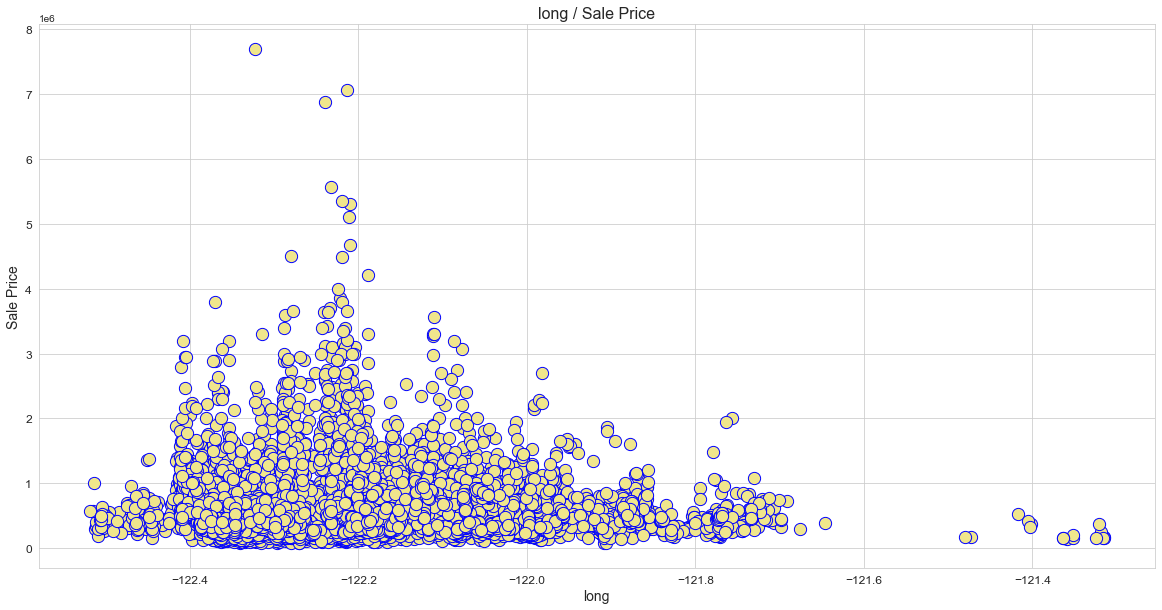

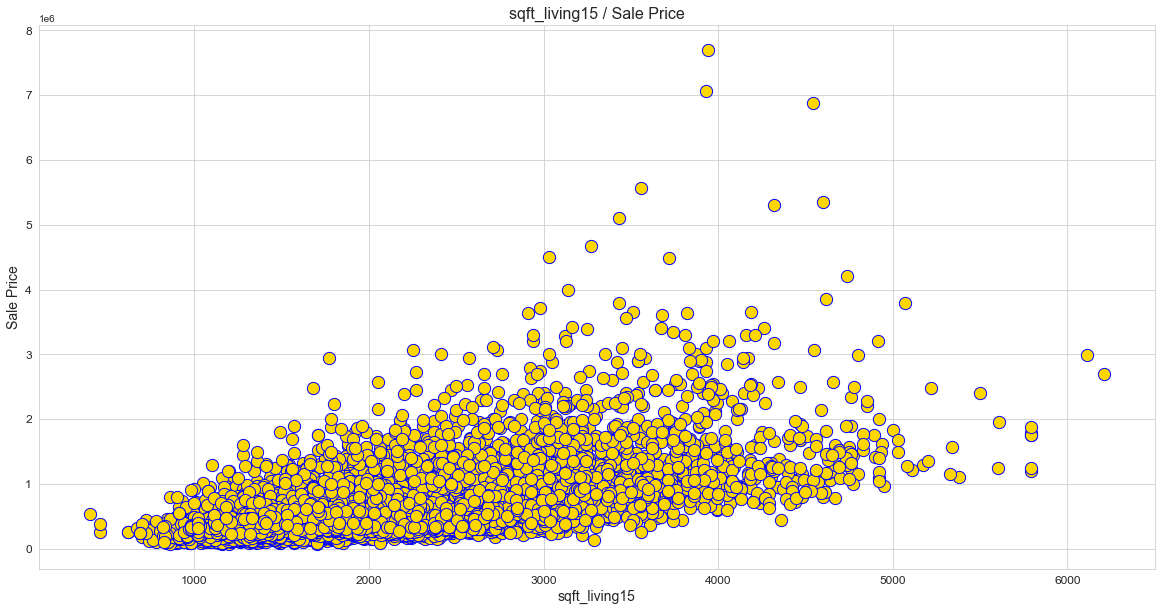

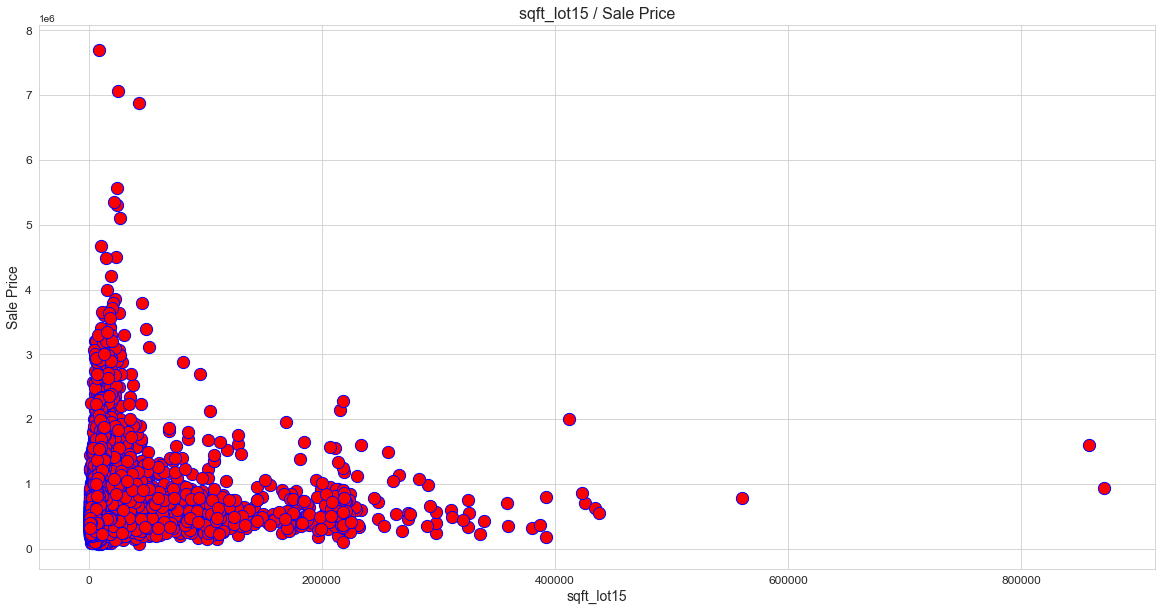

In [43]:
scatter_df('price', df.drop('price', axis=1).columns)

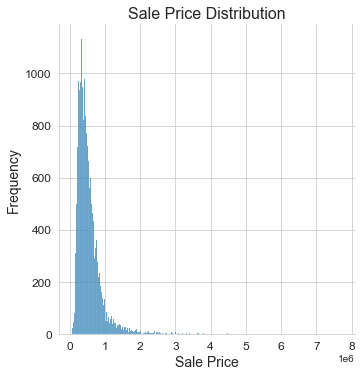

In [47]:
# 3. Distribution plot
sns.displot(df['price'])
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

[top](#outline)

<a id='section4'></a>
### 4. Preprocessing for Model
Preprocessing is syntactically different for sklearn and keras, so we need to make two seperate datasets. We'll need to change the type for the date column to an int, so a good option is the unix timestamp

In [108]:
# Convert date to integer
df['date'] = pd.to_datetime(df['date'].values).astype(int)

# Model 1
model1_df = df.copy() # remove the date column

# Identify features and labels
features1 = model1_df.drop('price', axis=1).values
labels1 = model1_df['price'].values

# Split data into training and test sets
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features1, labels1, test_size = 0.2, random_state = 0)

## Model 2
model2_df = df.copy() # remove the date column

# Split data into training and test sets
train_dataset = model2_df.sample(frac=0.8, random_state=0)
test_dataset = model2_df.drop(train_dataset.index)

# Split features from labels
train_features2 = train_dataset.copy()
test_features2 = test_dataset.copy()
train_labels2 = train_features2.pop('price')
test_labels2 = test_features2.pop('price')

[top](#outline)

<a id='section5'></a>
### 5. Model 1 - Linear Regression

In [109]:
reg = LinearRegression()
reg.fit(train_features1, train_labels1)

grad = ensemble.GradientBoostingRegressor(
    n_estimators=400,
    max_depth=5,
    min_samples_split=2,
    learning_rate=0.1,
    loss='ls',
    verbose=1
    )
grad.fit(train_features1, train_labels1)

      Iter       Train Loss   Remaining Time 
         1 117039205610.5149           54.23s
         2 100932642900.3981           52.90s
         3 87579177673.7209           51.45s
         4 76309982173.7551           50.96s
         5 67036050878.8341           50.37s
         6 59006522527.5884           50.53s
         7 52448867713.2010           50.05s
         8 46910221024.4899           51.17s
         9 42050442122.6471           50.71s
        10 38069612283.7611           50.82s
        20 18803529846.8483           48.12s
        30 12987982780.0271           47.75s
        40 10892550126.6695           46.14s
        50  9787119502.1121           44.65s
        60  9026283160.5512           43.85s
        70  8474245461.4024           42.68s
        80  7973259304.2879           41.31s
        90  7534926761.2753           39.90s
       100  7173771747.2175           38.57s
       200  5185135859.2069           25.65s
       300  4085813630.7384           12.83s
       

GradientBoostingRegressor(max_depth=5, n_estimators=400, verbose=1)

[top](#outline)

<a id='section6'></a>
### 6. Model 2 - Deep Neural Network

In [110]:
# Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features2))

# Configure model
model2 = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output layer
])

model2.compile(
    optimizer=tf.optimizers.Adam(0.001),
    loss='mean_absolute_error')

# Train model
%time
history = model2.fit(
    train_features2,
    train_labels2,
    epochs=100,
    # Allow logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 0 ns
Epoch 1/100
433/433 [==============================] - 3s 5ms/step - loss: 490518.6250 - val_loss: 305053.9688
Epoch 2/100
433/433 [==============================] - 2s 4ms/step - loss: 211743.3594 - val_loss: 169081.5469
Epoch 3/100
433/433 [==============================] - 2s 4ms/step - loss: 149413.6094 - val_loss: 134070.8906
Epoch 4/100
433/433 [==============================] - 2s 4ms/step - loss: 126275.8594 - val_loss: 120916.9219
Epoch 5/100
433/433 [==============================] - 2s 4ms/step - loss: 116617.2266 - val_loss: 115083.4844
Epoch 6/100
433/433 [==============================] - 2s 4ms/step - loss: 112613.3281 - val_loss: 112621.0312
Epoch 7/100
433/433 [==============================] - 2s 4ms/step - loss: 110508.0078 - val_loss: 111222.0312
Epoch 8/100
433/433 [==============================] - 2s 4ms/step - loss: 109260.9062 - val_loss: 110136.8906
Epoch 9/100
433/433 [==============================] - 2s 4ms/step - loss: 108340.0781 - val_los

[top](#outline)

<a id='section7'></a>

### 7. Evaluation

In [111]:
# Model 1 - Linear Regression
predictions_reg = reg.predict(test_features1)
print(f'Linear Regression R^2: {round(r2_score(test_labels1, predictions_reg),4)}')

predictions_grad = grad.predict(test_features1)
print(f'Gradient Boosting Regression R^2: {round(r2_score(test_labels1, predictions_grad),4)}')

# Model 2 - Deep Neural Net
predictions2 = model2.predict(test_features2)
print(f'Deep Neural Network R^2: {round(r2_score(test_labels2, predictions2),4)}')

Linear Regression R^2: 0.5488
Gradient Boosting Regression R^2: 0.9034
Deep Neural Network R^2: 0.795


**Conclusions:** 
- Linear Regression is not suitable for this dataset
- While the Deep Neural Network takes longer to fit, it is significantly more accurate than the basic Linear Regression model
- The Gradient Boosting Regression is the most accurate, and takes less time to fit than the Deep Neural Network

[top](#outline)